# Complete Guide to Matrices in Linear Algebra

## Learning Objectives
By the end of this notebook, you will understand:
1. What matrices are and how to create them
2. Matrix operations (addition, multiplication, transpose)
3. Special matrices (identity, diagonal, inverse)
4. Matrix properties and transformations
5. How matrices power Machine Learning algorithms

---

## 1. What is a Matrix?

### Intuitive Understanding
A **matrix** is a 2D array of numbers arranged in rows and columns.

**Real-world examples:**
- Image: Each pixel is a matrix element
- Spreadsheet: Rows and columns of data
- Dataset: Each row is a data sample, each column is a feature
- Neural network weights: Connections between layers

### Mathematical Representation
A matrix with m rows and n columns (m×n matrix):

$$A = \begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}$$

- **Shape:** (m, n) = (rows, columns)
- **Element access:** $a_{ij}$ = element at row i, column j

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Creating matrices in NumPy

# Method 1: From a list of lists
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6]])

# Method 2: Using NumPy functions
zeros_matrix = np.zeros((3, 3))      # 3×3 matrix of zeros
ones_matrix = np.ones((2, 4))        # 2×4 matrix of ones
identity = np.eye(3)                 # 3×3 identity matrix
random_matrix = np.random.rand(2, 3) # 2×3 random matrix

print("Matrix A:")
print(matrix_a)
print("\nShape:", matrix_a.shape)  # (rows, columns)
print("Number of dimensions:", matrix_a.ndim)
print("Total elements:", matrix_a.size)

print("\n" + "="*50)
print("\nZeros Matrix (3×3):")
print(zeros_matrix)

print("\nOnes Matrix (2×4):")
print(ones_matrix)

print("\nIdentity Matrix (3×3):")
print(identity)

print("\nRandom Matrix (2×3):")
print(random_matrix)

Matrix A:
[[1 2 3]
 [4 5 6]]

Shape: (2, 3)
Number of dimensions: 2
Total elements: 6


Zeros Matrix (3×3):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Ones Matrix (2×4):
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Identity Matrix (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Random Matrix (2×3):
[[0.89347911 0.11419517 0.61023077]
 [0.05149081 0.38197283 0.78151407]]


### Accessing Matrix Elements

In [45]:
matrix = np.array([[10, 20, 30],
                   [40, 50, 60],
                   [70, 80, 90]])

print("Full Matrix:")
print(matrix)

# Access single element (row 0, column 1)
print("\nElement at [0,1]:", matrix[0, 1])  # Returns 20

# Access entire row
print("First row:", matrix[0,:])           # Returns [10, 20, 30]

# Access entire column
print("Second column:", matrix[:, 1])       # Returns [20, 50, 80]

# Access submatrix (slicing)
print("\nTop-left 2×2 submatrix:")
print(matrix[0:2, 0:2])

Full Matrix:
[[10 20 30]
 [40 50 60]
 [70 80 90]]

Element at [0,1]: 20
First row: [10 20 30]
Second column: [20 50 80]

Top-left 2×2 submatrix:
[[10 20]
 [40 50]]


### Visualizing Matrices

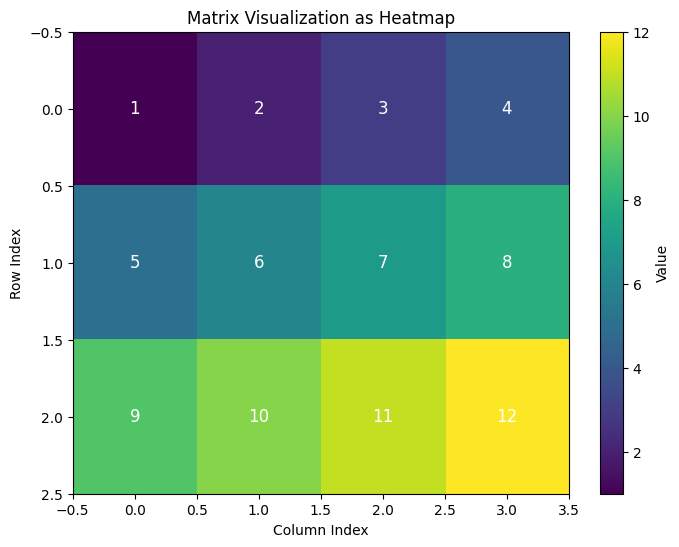

Matrix shape: (3, 4)
This is a 3×4 matrix (3 rows, 4 columns)


In [75]:
# Create a sample matrix
sample_matrix = np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8],
                          [9, 10, 11, 12]])

# Visualize as heatmap
plt.figure(figsize=(8, 6))
plt.imshow(sample_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Matrix Visualization as Heatmap')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Add text annotations
#i, j pixel position -
for i in range(sample_matrix.shape[0]):
    for j in range(sample_matrix.shape[1]):
        plt.text(j,i, str(sample_matrix[i,j]),  # overlaying labels    
                ha='center', va='center', color='white', fontsize=12)

plt.show()

print("Matrix shape:", sample_matrix.shape)
print("This is a 3×4 matrix (3 rows, 4 columns)")

---
## 2. Matrix Operations

### 2.1 Matrix Addition and Subtraction
Matrices must have the **same shape** to be added or subtracted.

$$A + B = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} + \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix} = \begin{bmatrix} a_{11}+b_{11} & a_{12}+b_{12} \\ a_{21}+b_{21} & a_{22}+b_{22} \end{bmatrix}$$

In [47]:
# Matrix addition
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Addition
C = A + B
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nA + B:")
print(C)

# Subtraction
D = A - B
print("\nA - B:")
print(D)

# Scalar multiplication
E = 3 * A
print("\n3 × A:")
print(E)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

A + B:
[[ 6  8]
 [10 12]]

A - B:
[[-4 -4]
 [-4 -4]]

3 × A:
[[ 3  6]
 [ 9 12]]


### 2.2 Matrix Multiplication
**Most important operation in ML!**

Rules:
- For A×B to be valid: **columns of A must equal rows of B**
- If A is (m×n) and B is (n×p), result C is (m×p)

Formula:
$$C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}$$

**Key insight:** Each element is a dot product of a row from A with a column from B!

In [76]:
# Matrix multiplication
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2×3 matrix

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])   # 3×2 matrix

# Method 1: Using @ operator (recommended)
C = A @ B

# Method 2: Using np.matmul
C_alt = np.matmul(A, B)

# Method 3: Using np.dot
C_dot = np.dot(A, B)

print("Matrix A (2×3):")
print(A)
print("\nMatrix B (3×2):")
print(B)
print("\nA @ B (2×2):")
print(C)

# Manual calculation for understanding
print("\n--- Manual Calculation ---")
print(f"C[0,0] = {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} + {A[0,2]}×{B[2,0]} = {A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]}")
print(f"C[0,1] = {A[0,0]}×{B[0,1]} + {A[0,1]}×{B[1,1]} + {A[0,2]}×{B[2,1]} = {A[0,0]*B[0,1] + A[0,1]*B[1,1] + A[0,2]*B[2,1]}")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

A @ B (2×2):
[[ 58  64]
 [139 154]]

--- Manual Calculation ---
C[0,0] = 1×7 + 2×9 + 3×11 = 58
C[0,1] = 1×8 + 2×10 + 3×12 = 64


### ⚠️ Important: Matrix Multiplication is NOT Element-wise

In [78]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Matrix multiplication (dot product)
matrix_mult = A @ B

# Element-wise multiplication (Hadamard product)
elementwise_mult = A * B

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

print("\nMatrix Multiplication (A @ B):")
print(matrix_mult)

print("\nElement-wise Multiplication (A * B):")
print(elementwise_mult)

print("\n ! These are DIFFERENT operations!")

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Matrix Multiplication (A @ B):
[[19 22]
 [43 50]]

Element-wise Multiplication (A * B):
[[ 5 12]
 [21 32]]

 ! These are DIFFERENT operations!


### 2.3 Matrix Transpose
Flipping rows and columns: $(A^T)_{ij} = A_{ji}$

Original Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Transpose A^T (3×2):
[[1 4]
 [2 5]
 [3 6]]


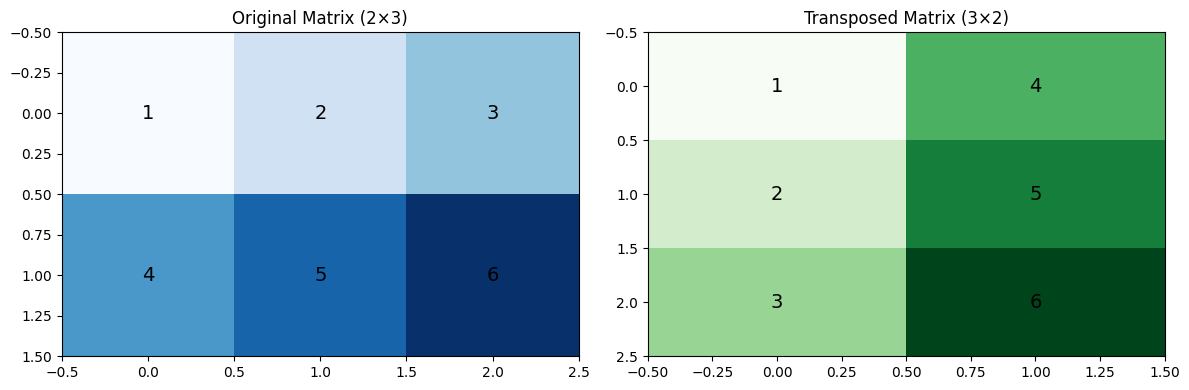

In [80]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

A_transpose = A.T  # or np.transpose(A)

print("Original Matrix A (2×3):")
print(A)
print("\nTranspose A^T (3×2):")
print(A_transpose)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(A, cmap='Blues', aspect='auto')
ax1.set_title('Original Matrix (2×3)')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax1.text(j, i, str(A[i, j]), ha='center', va='center', fontsize=14)

ax2.imshow(A_transpose, cmap='Greens', aspect='auto')
ax2.set_title('Transposed Matrix (3×2)')
for i in range(A_transpose.shape[0]):
    for j in range(A_transpose.shape[1]):
        ax2.text(j, i, str(A_transpose[i, j]), ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

---
## 3. Special Matrices

### 3.1 Identity Matrix (I)
Like the number "1" for matrices: $A \times I = I \times A = A$

$$I = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [51]:
# Create identity matrix
I = np.eye(3)

print("Identity Matrix (3×3):")
print(I)

# Test identity property
A = np.array([[2, 3],
              [4, 5]])

I2 = np.eye(2)

print("\nMatrix A:")
print(A)

print("\nA @ I:")
print(A @ I2)

print("\nI @ A:")
print(I2 @ A)

print("\n✓ A @ I = I @ A = A (Identity property verified!)")

Identity Matrix (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matrix A:
[[2 3]
 [4 5]]

A @ I:
[[2. 3.]
 [4. 5.]]

I @ A:
[[2. 3.]
 [4. 5.]]

✓ A @ I = I @ A = A (Identity property verified!)


### 3.2 Diagonal Matrix
All non-diagonal elements are zero

In [82]:
# Create diagonal matrix
diagonal_values = [1, 2, 3, 4]
D = np.diag(diagonal_values)

print("Diagonal Matrix:")
print(D)

# Extract diagonal from existing matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

diagonal = np.diag(A)
print("\nMatrix A:")
print(A)
print("\nDiagonal elements:", diagonal)

Diagonal Matrix:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Diagonal elements: [1 5 9]


### 3.3 Matrix Inverse (A⁻¹)
The "reciprocal" of a matrix: $A \times A^{-1} = A^{-1} \times A = I$

**Important:** Not all matrices have an inverse! (Only square matrices with non-zero determinant)

In [84]:
# Matrix inverse
A = np.array([[4, 7],
              [2, 6]], dtype=float)

# Calculate inverse
A_inv = np.linalg.inv(A)

print("Matrix A:")
print(A)

print("\nInverse A⁻¹:")
print(A_inv)

# Verify: A @ A_inv should equal I
I_verify = A @ A_inv
print("\nA @ A⁻¹ (should be I):")
print(I_verify)

# Check if close to identity (accounting for floating point errors)
print("\nIs it close to identity?", np.allclose(I_verify, np.eye(2)))

Matrix A:
[[4. 7.]
 [2. 6.]]

Inverse A⁻¹:
[[ 0.6 -0.7]
 [-0.2  0.4]]

A @ A⁻¹ (should be I):
[[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]

Is it close to identity? True


### 3.4 Symmetric Matrix
$A = A^T$ (equal to its own transpose)

In [85]:
# Create symmetric matrix
S = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])

print("Symmetric Matrix S:")
print(S)

print("\nTranspose S^T:")
print(S.T)

print("\nIs S symmetric?", np.allclose(S, S.T))

# Important in ML: Covariance matrices are always symmetric!

Symmetric Matrix S:
[[1 2 3]
 [2 4 5]
 [3 5 6]]

Transpose S^T:
[[1 2 3]
 [2 4 5]
 [3 5 6]]

Is S symmetric? True


---
## 4. Matrix Properties

### 4.1 Determinant
A scalar value that encodes important properties of a matrix
- If det(A) = 0: matrix is **singular** (no inverse)
- If det(A) ≠ 0: matrix is **invertible**

In [87]:
# Calculate determinant
A = np.array([[4, 7],
              [2, 6]])

det_A = np.linalg.det(A)

print("Matrix A:")
print(A)
print("\nDeterminant:", det_A)

# For 2×2 matrix: det = ad - bc
det_manual = A[0,0]*A[1,1] - A[0,1]*A[1,0]
print("Manual calculation: (4×6) - (7×2) =", det_manual)

# Singular matrix example (determinant = 0)
singular = np.array([[1, 2],
                     [2, 4]])

print("\nSingular Matrix:")
print(singular)
print("Determinant:", np.linalg.det(singular))
print("This matrix has NO inverse!")

Matrix A:
[[4 7]
 [2 6]]

Determinant: 10.000000000000002
Manual calculation: (4×6) - (7×2) = 10

Singular Matrix:
[[1 2]
 [2 4]]
Determinant: 0.0
This matrix has NO inverse!


### 4.2 Trace
Sum of diagonal elements: $\text{tr}(A) = \sum_{i} A_{ii}$

In [56]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

trace_A = np.trace(A)

print("Matrix A:")
print(A)
print("\nTrace (sum of diagonal):", trace_A)
print("Manual: 1 + 5 + 9 =", 1+5+9)


Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Trace (sum of diagonal): 15
Manual: 1 + 5 + 9 = 15


### 4.3 Rank
Number of linearly independent rows/columns

In [90]:
# Full rank matrix
A = np.array([[1, 2],
              [3, 4]])

rank_A = np.linalg.matrix_rank(A)

print("Matrix A (2×2):")
print(A)
print("Rank:", rank_A)
print("Full rank? (rank = min(rows, cols)):", rank_A == min(A.shape))

# Rank deficient matrix
B = np.array([[1, 2],
              [2, 4]])  # Second row is 2× first row

rank_B = np.linalg.matrix_rank(B)

print("\nMatrix B (2×2):")
print(B)
print("Rank:", rank_B)
print("Rank deficient! (rows are linearly dependent)")

Matrix A (2×2):
[[1 2]
 [3 4]]
Rank: 2
Full rank? (rank = min(rows, cols)): True

Matrix B (2×2):
[[1 2]
 [2 4]]
Rank: 1
Rank deficient! (rows are linearly dependent)


---
## 5. Matrix Transformations

Matrices can represent geometric transformations!

### 5.1 Scaling

Scaling Matrix:
[[2 0]
 [0 2]]

Original point: [1 1]
Scaled point: [2 2]


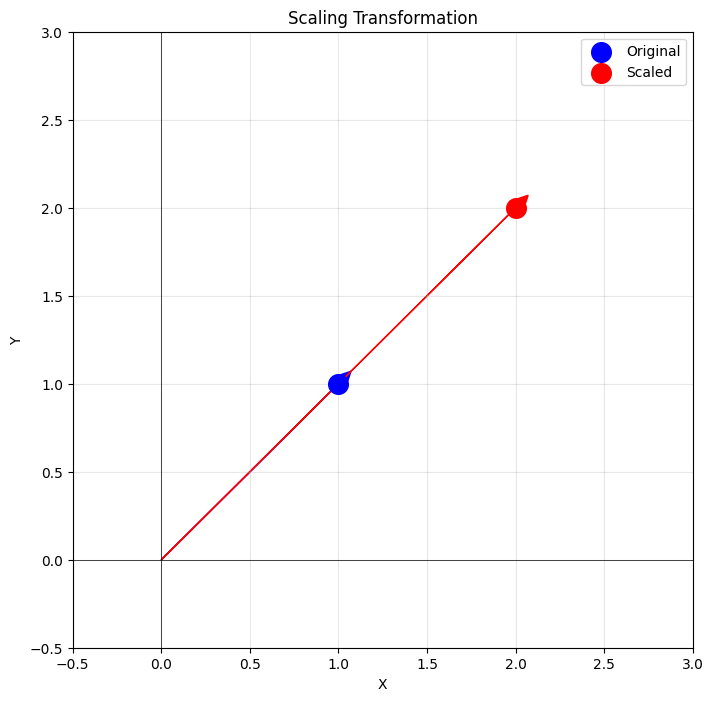

In [58]:
# Scaling transformation
scale_matrix = np.array([[2, 0],
                         [0, 2]])  # Scale by 2 in both directions

# Original point
point = np.array([1, 1])

# Transform
scaled_point = scale_matrix @ point

print("Scaling Matrix:")
print(scale_matrix)
print("\nOriginal point:", point)
print("Scaled point:", scaled_point)

# Visualize
plt.figure(figsize=(8, 8))
plt.scatter(*point, s=200, c='blue', label='Original', zorder=3)
plt.scatter(*scaled_point, s=200, c='red', label='Scaled', zorder=3)
plt.arrow(0, 0, point[0], point[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.arrow(0, 0, scaled_point[0], scaled_point[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scaling Transformation')
plt.show()

### 5.2 Rotation

Rotation Matrix (45°):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Original point: [2 0]
Rotated point: [1.41421356 1.41421356]


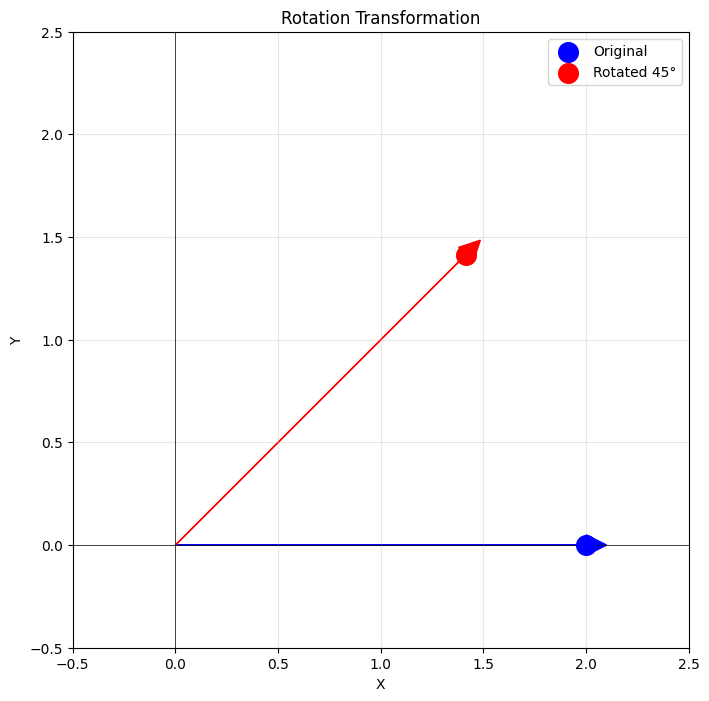

In [98]:
# Rotation matrix (rotate by theta degrees)
ang = 4
theta = np.pi / ang  # 45 degrees

rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])

point = np.array([2, 0])
rotated_point = rotation_matrix @ point

print("Rotation Matrix (45°):")
print(rotation_matrix)
print("\nOriginal point:", point)
print("Rotated point:", rotated_point)

# Visualize
plt.figure(figsize=(8, 8))
plt.scatter(*point, s=200, c='blue', label='Original', zorder=3)
plt.scatter(*rotated_point, s=200, c='red', label='Rotated 45°', zorder=3)
plt.arrow(0, 0, point[0], point[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.arrow(0, 0, rotated_point[0], rotated_point[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Rotation Transformation')
plt.gca().set_aspect('equal')
plt.show()

---
## 6. Matrices in Machine Learning

### 6.1 Dataset Representation
**Every dataset is a matrix!**

In [60]:
# Dataset: 5 houses with 4 features each
# Features: [square_feet, bedrooms, bathrooms, age_years]
X = np.array([
    [2000, 3, 2, 10],
    [1500, 2, 1, 5],
    [2500, 4, 3, 15],
    [1800, 3, 2, 8],
    [2200, 3, 2.5, 12]
])

print("Dataset Matrix X:")
print(X)
print("\nShape:", X.shape, "(5 samples, 4 features)")

# Each ROW is a data sample
print("\nFirst house:", X[0, :])

# Each COLUMN is a feature
print("Square feet for all houses:", X[:, 0])

# Target values (prices)
y = np.array([300000, 250000, 400000, 280000, 350000])
print("\nPrices (target):", y)

Dataset Matrix X:
[[2.0e+03 3.0e+00 2.0e+00 1.0e+01]
 [1.5e+03 2.0e+00 1.0e+00 5.0e+00]
 [2.5e+03 4.0e+00 3.0e+00 1.5e+01]
 [1.8e+03 3.0e+00 2.0e+00 8.0e+00]
 [2.2e+03 3.0e+00 2.5e+00 1.2e+01]]

Shape: (5, 4) (5 samples, 4 features)

First house: [2000.    3.    2.   10.]
Square feet for all houses: [2000. 1500. 2500. 1800. 2200.]

Prices (target): [300000 250000 400000 280000 350000]


### 6.2 Linear Regression with Matrices
The entire linear regression formula in one line!

$$\hat{y} = Xw + b$$

Where:
- X = data matrix (m samples × n features)
- w = weight vector (n × 1)
- b = bias (scalar)
- ŷ = predictions (m × 1)

Input (Square Feet):
[1000 1500 2000 2500 3000]

True Prices:
[200000 250000 300000 350000 400000]

Predicted Prices:
[200000 250000 300000 350000 400000]


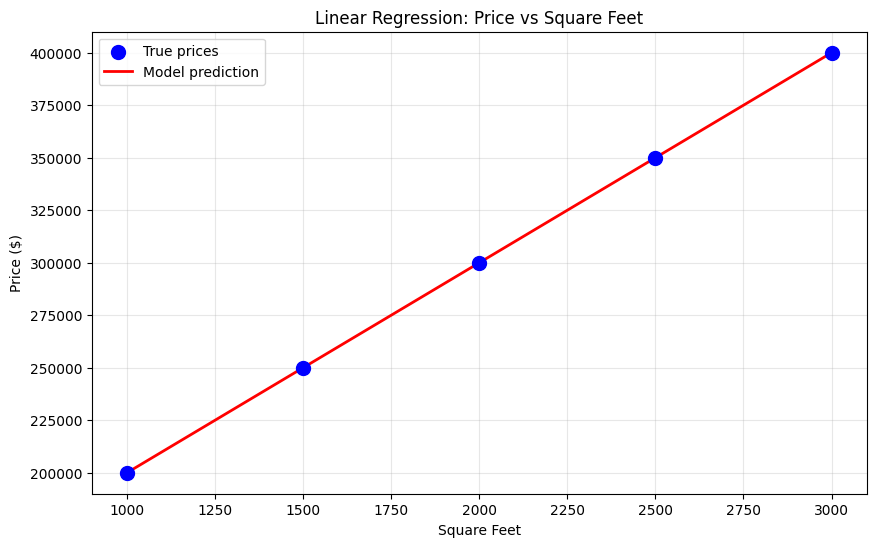

In [61]:
# Simple linear regression example
# Predict house price from square feet

# Data: square feet
X_simple = np.array([[1000], [1500], [2000], [2500], [3000]])
y_true = np.array([200000, 250000, 300000, 350000, 400000])

# Model parameters (learned from data)
w = 100  # $100 per square foot
b = 100000  # Base price

# Predictions using matrix multiplication
y_pred = X_simple @ np.array([[w]]) + b
y_pred = y_pred.flatten()

print("Input (Square Feet):")
print(X_simple.flatten())
print("\nTrue Prices:")
print(y_true)
print("\nPredicted Prices:")
print(y_pred)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_true, s=100, c='blue', label='True prices', zorder=3)
plt.plot(X_simple, y_pred, 'r-', linewidth=2, label='Model prediction')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.title('Linear Regression: Price vs Square Feet')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 6.3 Neural Network Layer
A single layer is just matrix multiplication!

$$\text{output} = \text{activation}(X \cdot W + b)$$

In [62]:
# Simple neural network layer
def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

# Input: 3 samples with 4 features each
X = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# Weights: transform 4 features to 2 neurons
W = np.random.randn(4, 2)

# Bias: one for each output neuron
b = np.array([0.5, -0.5])

# Forward pass
z = X @ W + b  # Linear transformation
output = relu(z)  # Non-linear activation

print("Input X (3 samples × 4 features):")
print(X)
print("\nWeights W (4 features × 2 neurons):")
print(W)
print("\nBias b (2 neurons):")
print(b)
print("\nLinear output (before activation):")
print(z)
print("\nFinal output (after ReLU):")
print(output)
print("\nOutput shape:", output.shape, "(3 samples × 2 neurons)")

Input X (3 samples × 4 features):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Weights W (4 features × 2 neurons):
[[ 2.42344005  1.40703966]
 [ 1.58107074  0.49520561]
 [-0.36174879 -0.47991477]
 [-0.43233055 -0.71674115]]

Bias b (2 neurons):
[ 0.5 -0.5]

Linear output (before activation):
[[ 3.27101294 -2.40925806]
 [16.1127387   0.41309928]
 [28.95446446  3.23545663]]

Final output (after ReLU):
[[ 3.27101294  0.        ]
 [16.1127387   0.41309928]
 [28.95446446  3.23545663]]

Output shape: (3, 2) (3 samples × 2 neurons)


### 6.4 Covariance Matrix
Understanding relationships between features

Covariance Matrix:
[[0.82476989 0.63618508]
 [0.63618508 0.52642277]]

Interpretation:
Variance of feature 1: 0.825
Variance of feature 2: 0.526
Covariance between features: 0.636

Positive covariance → features move together!


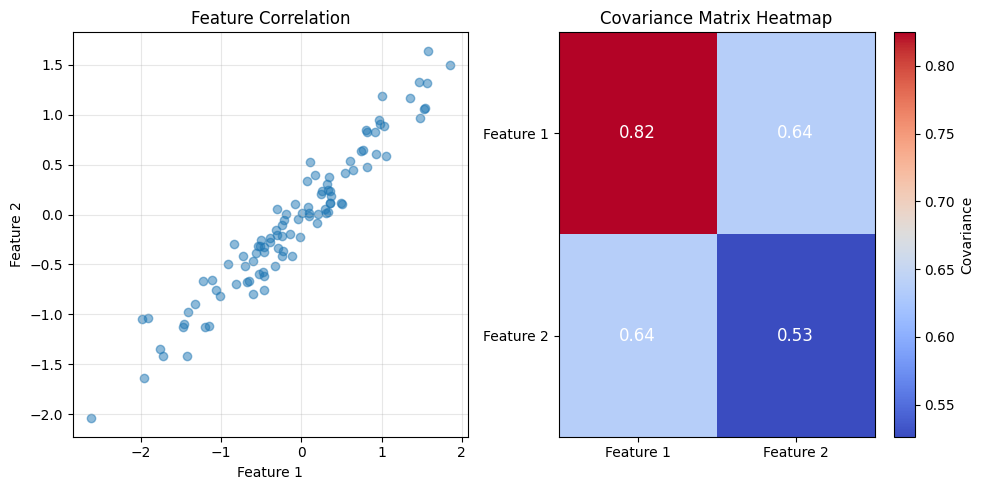

In [63]:
# Sample data: 2 features
np.random.seed(42)
feature1 = np.random.randn(100)
feature2 = 0.8 * feature1 + 0.2 * np.random.randn(100)  # Correlated

X = np.column_stack([feature1, feature2])

# Calculate covariance matrix
cov_matrix = np.cov(X.T)  # Note: transpose for correct shape

print("Covariance Matrix:")
print(cov_matrix)
print("\nInterpretation:")
print(f"Variance of feature 1: {cov_matrix[0, 0]:.3f}")
print(f"Variance of feature 2: {cov_matrix[1, 1]:.3f}")
print(f"Covariance between features: {cov_matrix[0, 1]:.3f}")
print("\nPositive covariance → features move together!")

# Visualize
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(feature1, feature2, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Correlation')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.imshow(cov_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xticks([0, 1], ['Feature 1', 'Feature 2'])
plt.yticks([0, 1], ['Feature 1', 'Feature 2'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{cov_matrix[i, j]:.2f}', 
                ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

---
## 7. Practice Exercises

### Exercise 1: Basic Matrix Operations
Given matrices:
```
A = [[1, 2],    B = [[5, 6],
     [3, 4]]         [7, 8]]
```
Calculate:
1. A + B
2. A @ B
3. A^T
4. det(A)

In [64]:
# Exercise 1 - Your code here
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# YOUR CODE HERE


### Exercise 2: Matrix Inverse
Find the inverse of matrix C and verify that C @ C_inv = I
```
C = [[2, 1],
     [1, 1]]
```

In [65]:
# Exercise 2 - Your code here
C = np.array([[2, 1],
              [1, 1]], dtype=float)

# YOUR CODE HERE


### Exercise 3: Linear Transformation
Apply a scaling transformation (scale x by 3, y by 2) to the point [2, 4]

In [66]:
# Exercise 3 - Your code here
point = np.array([2, 4])

# Create scaling matrix
# YOUR CODE HERE


### Exercise 4: Neural Network Mini-Project
Implement a 2-layer neural network:
- Input: 3 features
- Hidden layer: 4 neurons
- Output: 1 neuron

Use random weights and compute output for input [1, 2, 3]

In [67]:
# Exercise 4 - Your code here
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Input
X = np.array([[1, 2, 3]])

# YOUR CODE HERE
# Create W1 (3×4), b1 (4,)
# Create W2 (4×1), b2 (1,)
# Compute hidden = sigmoid(X @ W1 + b1)
# Compute output = sigmoid(hidden @ W2 + b2)


---
## 8. Solutions

In [68]:
print("=== SOLUTIONS ===")

# Exercise 1
print("\nExercise 1:")
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("1. A + B:\n", A + B)
print("2. A @ B:\n", A @ B)
print("3. A^T:\n", A.T)
print("4. det(A):", np.linalg.det(A))

# Exercise 2
print("\nExercise 2:")
C = np.array([[2, 1], [1, 1]], dtype=float)
C_inv = np.linalg.inv(C)
print("C inverse:\n", C_inv)
print("C @ C_inv:\n", C @ C_inv)
print("Is identity?", np.allclose(C @ C_inv, np.eye(2)))

# Exercise 3
print("\nExercise 3:")
point = np.array([2, 4])
scale_matrix = np.array([[3, 0], [0, 2]])
transformed = scale_matrix @ point
print("Original:", point)
print("Transformed:", transformed)

# Exercise 4
print("\nExercise 4:")
X = np.array([[1, 2, 3]])
W1 = np.random.randn(3, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 1)
b2 = np.random.randn(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

hidden = sigmoid(X @ W1 + b1)
output = sigmoid(hidden @ W2 + b2)
print("Network output:", output[0])

=== SOLUTIONS ===

Exercise 1:
1. A + B:
 [[ 6  8]
 [10 12]]
2. A @ B:
 [[19 22]
 [43 50]]
3. A^T:
 [[1 3]
 [2 4]]
4. det(A): -2.0000000000000004

Exercise 2:
C inverse:
 [[ 1. -1.]
 [-1.  2.]]
C @ C_inv:
 [[1. 0.]
 [0. 1.]]
Is identity? True

Exercise 3:
Original: [2 4]
Transformed: [6 8]

Exercise 4:
Network output: [0.78283338]


---
## 9. Key Takeaways

### What You Learned:
1. ✅ Matrices are 2D arrays organizing data in rows and columns
2. ✅ Matrix multiplication is fundamental to ML (not element-wise!)
3. ✅ Special matrices: Identity, diagonal, inverse, symmetric
4. ✅ Matrix properties: determinant, trace, rank
5. ✅ Matrices represent linear transformations (scaling, rotation)
6. ✅ Every ML algorithm uses matrices extensively

### Matrices in Machine Learning:
- **Datasets:** Rows = samples, Columns = features
- **Neural networks:** Weights are matrices
- **Linear regression:** y = Xw + b
- **Covariance:** Feature relationships
- **PCA:** Eigenvalue decomposition
- **CNNs:** Convolution = matrix operations

### Next Steps:
Move to **Tensor Operations** notebook to extend to higher dimensions!

---

**Congratulations! You've mastered matrices! 🎉**